In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tr
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import sklearn.datasets as dt
import sklearn.model_selection as ms
import sklearn.neighbors as ne 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [6]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\healthcare-dataset-stroke-data.csv") #Reading the dataset
print(df.head())
print(df.shape)

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
(5110, 12)


In [30]:
#Datapreperation using labelencoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['gender']=lb.fit_transform(df['gender'])
df['ever_married']=lb.fit_transform(df['ever_married'])
df['work_type']=lb.fit_transform(df['work_type'])
df['Residence_type']=lb.fit_transform(df['Residence_type'])
df['smoking_status']=lb.fit_transform(df['smoking_status'])

df.replace('\t?', float('nan'), inplace=True)  # Replace '\t?' with NaN
 
# Convert the relevant columns to float
columns_to_convert = [ 'gender',     'ever_married',   'work_type' ,  'Residence_type',  'smoking_status']
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')
 
# Drop rows with missing values
df.dropna(inplace=True)

In [8]:
df.shape

(4909, 12)

In [9]:
print(df.head())

      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   
5  56669       1  81.0             0              0             1          2   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1  
5               1             186.21  29.0               1       1  


In [10]:
#Checking for nulls
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
display(df.describe())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,0.410063,42.865374,0.091872,0.049501,0.652679,2.170096,0.507232,105.305150,28.893237,1.375433,0.042575
std,20995.098457,0.492309,22.555115,0.288875,0.216934,0.476167,1.092593,0.499999,44.424341,7.854067,1.067322,0.201917
min,77.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,18605.000000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.070000,23.500000,0.000000,0.000000
50%,37608.000000,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.680000,28.100000,2.000000,0.000000
75%,55220.000000,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.570000,33.100000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [12]:
nan_values = df.isnull().sum()
print(nan_values)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [13]:
X = df.iloc[:,:11]  # Features
y = df.iloc[:, -1]  #Target variable

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #Getting train and test data
print(y_train)
print(y_test)


795     0
3031    0
2438    0
2043    0
2032    0
       ..
4613    0
511     0
3247    0
3946    0
916     0
Name: stroke, Length: 3681, dtype: int64
4336    0
3709    0
964     0
2647    0
3262    0
       ..
564     0
3848    0
38      1
4748    0
1221    0
Name: stroke, Length: 1228, dtype: int64


# DECISION TREE

|--- feature_2 <= 66.50
|   |--- feature_2 <= 44.50
|   |   |--- feature_8 <= 58.11
|   |   |   |--- class: 0
|   |   |--- feature_8 >  58.11
|   |   |   |--- class: 0
|   |--- feature_2 >  44.50
|   |   |--- feature_0 <= 72916.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  72916.50
|   |   |   |--- class: 1
|--- feature_2 >  66.50
|   |--- feature_8 <= 238.93
|   |   |--- feature_0 <= 5352.00
|   |   |   |--- class: 0
|   |   |--- feature_0 >  5352.00
|   |   |   |--- class: 0
|   |--- feature_8 >  238.93
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1



[Text(0.5, 0.875, 'x[2] <= 66.5\ngini = 0.076\nsamples = 3681\nvalue = [3535, 146]'),
 Text(0.25, 0.625, 'x[2] <= 44.5\ngini = 0.037\nsamples = 3065\nvalue = [3008, 57]'),
 Text(0.125, 0.375, 'x[8] <= 58.115\ngini = 0.006\nsamples = 1859\nvalue = [1853, 6]'),
 Text(0.0625, 0.125, 'gini = 0.077\nsamples = 50\nvalue = [48, 2]'),
 Text(0.1875, 0.125, 'gini = 0.004\nsamples = 1809\nvalue = [1805, 4]'),
 Text(0.375, 0.375, 'x[0] <= 72916.5\ngini = 0.081\nsamples = 1206\nvalue = [1155, 51]'),
 Text(0.3125, 0.125, 'gini = 0.08\nsamples = 1205\nvalue = [1155, 50]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.625, 'x[8] <= 238.925\ngini = 0.247\nsamples = 616\nvalue = [527, 89]'),
 Text(0.625, 0.375, 'x[0] <= 5352.0\ngini = 0.231\nsamples = 593\nvalue = [514, 79]'),
 Text(0.5625, 0.125, 'gini = 0.402\nsamples = 43\nvalue = [31, 12]'),
 Text(0.6875, 0.125, 'gini = 0.214\nsamples = 550\nvalue = [483, 67]'),
 Text(0.875, 0.375, 'x[1] <= 0.5\ngini = 0.491\nsample

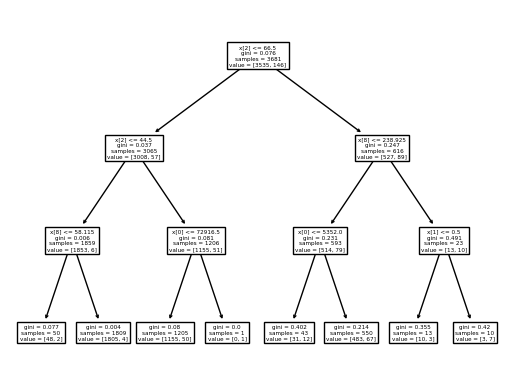

In [16]:

# Decision tree
from sklearn import tree
DT=tr.DecisionTreeClassifier(max_depth=3)
DT.fit(X_train,y_train)
trACC=DT.score(X_train,y_train)
tesACC=DT.score(X_test,y_test)
model = DT.fit(X_train, y_train)
text_representation = tr.export_text(DT)
print(text_representation)
# To Visualize Decision Tree
tree.plot_tree(model)

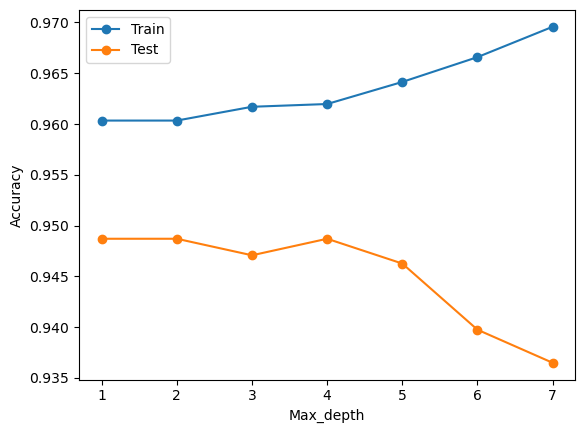

In [17]:
import matplotlib.pyplot as plt
# Decision tree
trACC=[]
tesACC=[]
MD=[]
#Checking for different depths
for i in range(1,8):
    #Create a Decision Tree classifier with the current max_depth
    DT=tr.DecisionTreeClassifier(max_depth=i)
    DT.fit(X_train,y_train)
    trACC.append(DT.score(X_train,y_train))
    tesACC.append(DT.score(X_test,y_test))
    MD.append(i)
plt.figure()
plt.plot(MD, trACC, label='Train',marker='o')
plt.plot(MD, tesACC, label='Test', marker='o')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# KNN

In [31]:
#KNN
#Finding best k and score
best_score = 0.0
best_k = 0
for k in range(1, 25):
    knn_clf_sk = KNN(n_neighbors=k)
    knn_clf_sk.fit(X_train, y_train)
    score = knn_clf_sk.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score

print("best_k = " + str(best_k))
print("best_score = " + str(best_score))
    

best_k = 4
best_score = 0.9486970684039088


[1.0, 0.9616951915240424, 0.960880195599022, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417]
[0.9258957654723127, 0.9478827361563518, 0.9438110749185668, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16

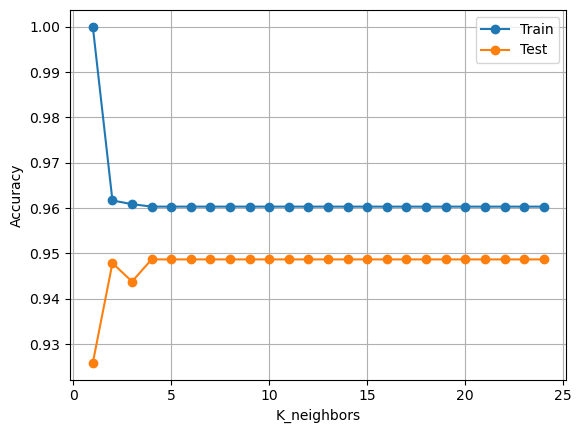

In [33]:
from sklearn.neighbors import KNeighborsClassifier

test_score=[]
train_score=[]
MD=[]
for i in range(1,25):
    knn=KNN(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_score.append(accuracy_score(y_train, y_pred_train))
    test_score.append(accuracy_score(y_test, y_pred_test))
    MD.append(i)
print(train_score)
print(test_score)
print(MD)  
# Visulaize accuracy
plt.figure()
plt.plot(MD, train_score, label='Train',marker='o')
plt.plot(MD, test_score, label='Test',marker='o')
plt.xlabel('K_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()


# SVM

[0.9603368649823417, 0.9546318935071991, 0.9603368649823417, 0.9603368649823417]
[0.9486970684039088, 0.9454397394136808, 0.9486970684039088, 0.9486970684039088]


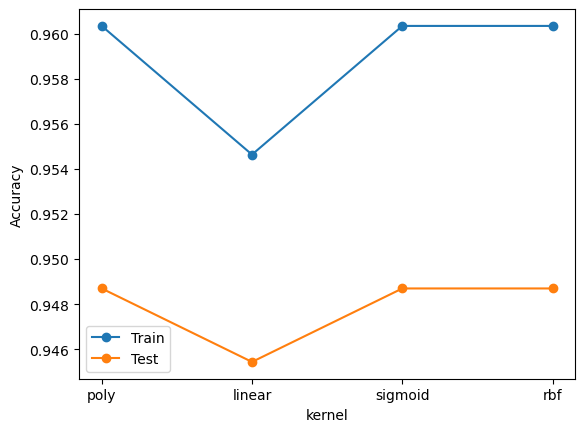

In [20]:
# SVM classification with different kernels to find the best kernal
import sklearn.svm as sv 
Acc_tr=[]
Acc_tes=[]
kernel=[]
 
for i in ['poly', 'linear', 'sigmoid', 'rbf']:
    clsfi=sv.SVC(kernel=i, degree=3)
    clsfi.fit(X_train,y_train)
    Acc_tr.append(clsfi.score(X_train,y_train))
    Acc_tes.append(clsfi.score(X_test,y_test))
    kernel.append(i)
print(Acc_tr)
print(Acc_tes)    
 
plt.figure()
plt.plot(Acc_tr,label='Train', marker='o')
plt.plot(Acc_tes,label='Test', marker='o')
plt.xticks([0, 1, 2, 3], kernel)
plt.xlabel('kernel')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417, 0.9603368649823417]
[0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088, 0.9486970684039088]


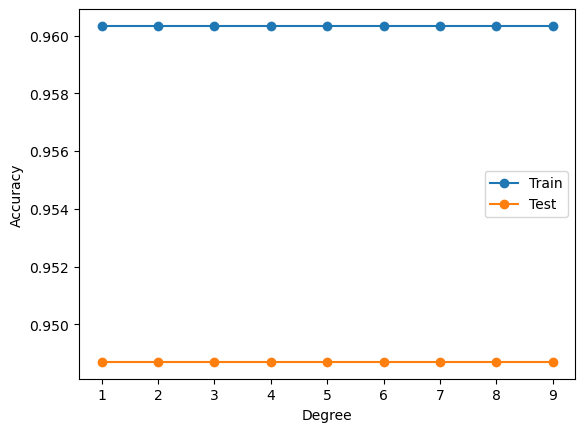

In [32]:
# SVM classification using polynomial kernel with different degrees
Acc_tr=[]
Acc_tes=[]
Degree=[]
 
for i in range(1,10):
    clsfi=sv.SVC(kernel='poly', degree=i)
    clsfi.fit(X_train,y_train)
    Acc_tr.append(clsfi.score(X_train,y_train))
    Acc_tes.append(clsfi.score(X_test,y_test))
    Degree.append(i)
print(Acc_tr)
print(Acc_tes)    
 
plt.figure()
plt.plot(Degree,Acc_tr,label='Train', marker='o')
plt.plot(Degree, Acc_tes,label='Test', marker='o')

plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

LR=LogisticRegression(max_iter=200)
LR.fit(X_train,y_train)

ACC_tr=LR.score(X_train,y_train)
ACC_tes=LR.score(X_test,y_test)


print('Train Accuracy',ACC_tr)
print('Test Accuracy', ACC_tes)


Train Accuracy 0.9595218690573214
Test Accuracy 0.9495114006514658


# NAIVE BAYES

In [26]:
import sklearn.naive_bayes as nb
# NB classifier
NB=nb.GaussianNB()
NB.fit(X_train,y_train)
ACC_tr=NB.score(X_train,y_train)
ACC_tes=NB.score(X_test,y_test)
print('Train_Accuracy=', ACC_tr)
print('Test_Accuracy=', ACC_tes)


Train_Accuracy= 0.9274653626731867
Test_Accuracy= 0.9128664495114006


In [8]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sklearn.naive_bayes as nb
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tr
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import sklearn.datasets as dt
import sklearn.model_selection as ms
import sklearn.neighbors as ne 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
  
def build_and_evaluate_models(df):
    from sklearn.preprocessing import LabelEncoder
    lb=LabelEncoder()
    df['gender']=lb.fit_transform(df['gender'])
    df['ever_married']=lb.fit_transform(df['ever_married'])
    df['work_type']=lb.fit_transform(df['work_type'])
    df['Residence_type']=lb.fit_transform(df['Residence_type'])
    df['smoking_status']=lb.fit_transform(df['smoking_status'])

    df.replace('\t?', float('nan'), inplace=True)  # Replace '\t?' with NaN
 
    # Convert the relevant columns to float
    columns_to_convert = [ 'gender',     'ever_married',   'work_type' ,  'Residence_type',  'smoking_status']
    for column in columns_to_convert:
        df[column] = pd.to_numeric(df[column], errors='coerce')
 
    # Drop rows with missing values
    df.dropna(inplace=True)
    df = df.dropna(subset=['bmi'])
    scaler=MinMaxScaler()
    scaled_values=scaler.fit_transform(df)
    df.loc[:,:]=scaled_values
    X_new = df.iloc[:,:11]  # Features
    y = df.iloc[:, -1]   # Target variable
 
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.35, random_state=42)
 
    # Feature scaling
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
 
    models = {}
    train_model={}
    models['Logistic Regression'] = LogisticRegression(solver='liblinear')
    models['KNN'] = KNeighborsClassifier(n_neighbors=4)  
    models['Decision Tree'] = DecisionTreeClassifier(max_depth=3)  
    models['SVM'] = SVC(kernel='poly', degree=3)  
    models['Gaussian']=nb.GaussianNB()
    
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        print(name,model.score(X_train_scaled, y_train))
        models[name] = accuracy
 
    return models
 
df=pd.read_csv("C:\\Users\\HP\\Downloads\\healthcare-dataset-stroke-data.csv")
print(build_and_evaluate_models(df))

Logistic Regression 0.9601880877742947
KNN 0.9608150470219435
Decision Tree 0.9605015673981191
SVM 0.9642633228840125
Gaussian 0.8724137931034482
{'Logistic Regression': 0.9522978475858057, 'KNN': 0.951716114019779, 'Decision Tree': 0.9522978475858057, 'SVM': 0.9505526468877254, 'Gaussian': 0.8714368819080861}
